In [10]:
%matplotlib notebook

import cv2
#import matplotlib.pyplot as plt
import signal

import tensorflow as tf
from matplotlib import pyplot
import numpy as np

import os
import json


models = {}
histories = {}
class_names = ["Access Granted","Access Denied - Please wear a mask over your nose.", "Access Denied - Please wear a mask over your mouth and nose.","Access Denied - Please wear a mask"]
for name in ["CNN"]:
    model_path = "saved_models/"+name
    history_path = "saved_histories/"+name+".json"
    histories[name] = {}
    if(os.path.exists(model_path) and os.path.exists(history_path)):
        models[name] = tf.keras.models.load_model(model_path)
        histories[name]["history"] = json.load(open(history_path, 'r'))

2.6.0


In [2]:
def predict(file_path):
    
    img = tf.keras.utils.load_img(file_path, target_size=(50, 50))
    pyplot.imshow(img)

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    for name in models:
        model = models[name]
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])


        print(
            "{} predicts {} ({:.2f}% confidence)"
            .format(name, class_names[np.argmax(score)], 100 * np.max(score))
        )

<IPython.core.display.Javascript object>


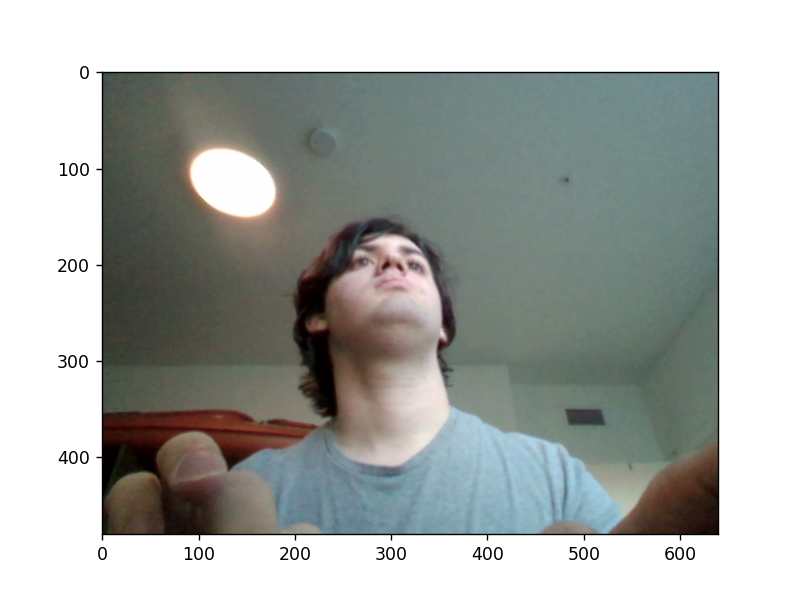

In [8]:
vc.release()
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True
    
vc = cv2.VideoCapture(0)

pyplot.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = pyplot.imshow(frame)
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    pyplot.draw()
    pyplot.pause(0.05)
    try:    # Avoids a NotImplementedError caused by `plt.pause`
        pyplot.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break

In [4]:
take_picture()

NameError: name 'take_picture' is not defined

In [ ]:
for history in histories.values():
    acc = history["history"]['accuracy']
    val_acc = history["history"]['val_accuracy']

    loss = history["history"]['loss']
    val_loss = history["history"]['val_loss']

    epochs = len(acc)
    epochs_range = range(epochs)

    pyplot.figure(figsize=(8, 8))
    pyplot.subplot(1, 2, 1)
    pyplot.plot(epochs_range, acc, label='Training Accuracy')
    pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
    pyplot.legend(loc='lower right')
    pyplot.title('Training and Validation Accuracy')

    pyplot.subplot(1, 2, 2)
    pyplot.plot(epochs_range, loss, label='Training Loss')
    pyplot.plot(epochs_range, val_loss, label='Validation Loss')
    pyplot.legend(loc='upper right')
    pyplot.title('Training and Validation Loss')
    pyplot.show()